# Tarea 1

En esta tarea repasaremos los conceptos de creación de variables y expresiones. La idea es hacerlo a través de ejemplos concretos y aplicados a situaciones que podrías enfrentarte en un entorno laboral. 

### PARTE 1

### Calculadora de préstamos

*1.* Trabajas en un banco que da préstamos a personas. Tu jefe te pide que generes una herramienta que le permita a las personas calcular cuáles son las cuotas mensuales y el costo total de la deuda. 

Te menciona que los pagos son mensuales, pero la herramienta debería tomar plazo, tasa de interés y monto del préstamo, y arrojarte una cuota. 
También te dice que la fórmula para calcular las cuotas es:

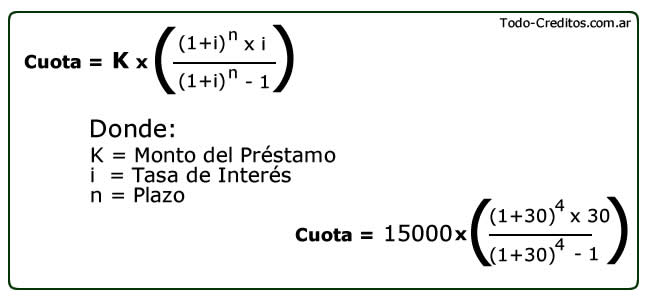

Te dieron un código pero tiene algunos errores y no está arrojando el resultado correcto

#### Antes, de empezar, un poco de contexto
Python tiene una función llamada input que te permite escribir un valor como si fuera un formulario, la función es muy útil si quieres pedir información de un usuario. Abajo hay un ejemplo

In [ ]:
edad = input("Dame tu edad")

In [ ]:
"mi edad es " + edad 

Ahora sí, manos a la obra

In [ ]:
# Generar información de préstamos
loanAmount = input("Cuánto quieres pedir prestado? \n")
interestRate = input("Cuál es la tasa de interés? \n")
repaymentLength = input("Cuántos años durará el préstamo? \n")

# Convertir las variables a número
loanAmount = float(loanAmount)
interestRate = float(interestRate)
repaymentLength = float(repaymentLength)

# Generar calculo de tasa de interés
interestCalculation = interestRate / 100 / 12

# Convertir el número de pagos anuales a mensuales
numberOfPayments = repaymentLength*12

#Formula
#M = L * ((I * ((1+I) ** n) / (1+I) ** n - 1))

#   * M = Pago mensual
#   * L = Monto préstamo
#   * I = Tasa de interés
#   * N = Número de pagos

monthlyRepaymentCost = loanAmount * (interestCalculation * (1+interestCalculation) * numberOfPayments) / ((1+interestCalculation) ** (numberOfPayments - 1))

# Ver cuánto te cobraran por el crédito
totalCharge = (monthlyRepaymentCost ** numberOfPayments) - loanAmount


print("Quieres pedir prestado $" + str(loanAmount) + " por " + str(repaymentLength) + " años, con una tasa de interés de " + str(interestRate) + "%!")

print("Tu pago mensual es de $" + str(monthlyRepaymentCost))

print("El costo de este préstamo es de " + totalCharge)

### Si la tasa de interes es igual a inflacion, dilo
if interestCalculation == 4.5:
    print("la tasa de interes es igual a la inflacion")

Cuánto quieres pedir prestado? 
1000
Cuál es la tasa de interés? 
10
Cuántos años durará el préstamo? 
1
Quieres pedir prestado $1000.0 por 1.0 años, con una tasa de interés de 10.0%!
Tu pago mensual es de $92.0362165594768


TypeError: ignored

Puedes verificar el resultado aquí

https://www.nafin.com/portalnf/content/herramientas-de-negocio/simulador-de-creditos/simulador-de-creditos.do

Preguntas que pueden ayudar 

a. ¿Qué hace el código float() y str() y para qué se usa?

b. ¿Qué hace * y **?

c. ¿Qué pasaría si se movieran los parentésis?

*2.* Tu jefe te pide que cambies el código para poder adecuar a pagos trimestrales,semestrales o anuales, cómo adecuarías el código para que la herramienta te pregunte qué frecuencia de pagos quieres y haga los cambios pertinentes

*3.* El código de arriba asume que el plazo siempre está en años, pero puede ser posible que pidas un crédito menor a un año. Cómo adecuarías el código para que pueda ser un préstamo con un plazo tan pequeño como 2 semanas. 

*4.* Ahora te pide que des la opción de un préstamos en pesos o dólares. En el caso que sea en dólares, debería transformarlo el pago mensual y el costo del préstamos a pesos con un tipo de cambio de 20 pesos por dólar. (Asume que el tipo de cambio es fijo en el contrato de préstamo)

*5.* Ahora te pide que utilices informacion del tipo de cambio en tiempo real para calcular el pago mensual y costo del préstamo 

Tips: 
- El código de abajo importa la biblioteca forex-python que te da el tipo de cambio entre diferentes monedas

In [ ]:
! pip install forex-python

- Para usar la biblioteca revisa la documentación:

https://forex-python.readthedocs.io/en/latest/usage.html

*6.*  Ahora te pide que generes la opción de convertir el pago a UDIS. La herramienta debería preguntarte en que prefieres el pago mensual y el costo del préstamo en UDIS o pesos.

Tips: Banxico tiene la información del valor más actualizado de UDIS. Para poder acceder a ella automaticamente vamos a usar un API. Vamos a ver más adelante en el curso como usarla, pero por ahora lo único que necesitas hacer es correr el código de abajo para generar el valor de UDI

Primero necesitas generar un token. En la página de Banxico se muestra cómo generarlo https://www.banxico.org.mx/SieAPIRest/service/v1/token

Una vez que ya lo tengas, escríbelo en la celda de abajo

In [10]:
## Este código sirve para guardar el valor del token de Banxico
from getpass import getpass
token = getpass("Escribe aquí el string del token que generaste en la página del Banxico")

Escribe aquí el string del token que generaste en la página del Banxico··········


Ahora la variable *token* guarda el valor del string, prueba abajo

In [11]:
token

'd'

Por último, corre el código de abajo, veras que la variable *udi* guarda el valor más reciente de UDI

In [1]:
# Este código sirve obtener un valor de Banxico 

# El número de serie de UDI en el sistema de consulta de Banxico
series = "SP68257"
# El url del cual obtener información
url_string = "https://www.banxico.org.mx/SieAPIRest/service/v1/series/{}/datos/oportuno?token={}".format(series, token)

# Importar las bibliotecas necesarias
import urllib.request, json 

# Obtener la información
with urllib.request.urlopen(url_string) as url:
    banxico_query = json.loads(url.read().decode())

# Limpiar la info para obtener la variable
udi = float(banxico_query["bmx"]["series"][0]["datos"][0]["dato"])

Ahora sí, adecua el código para que puedas usar la variable *udi* para poder hacer la estimación en UDIs

*7.* Ahora hay que revisar si hubiera convenido más hace 10 años tomar el préstamo en UDIs o dólares. Para eso, tomemos los valores del 31 de enero de 2010 y https://www.exchangerates.org.uk/USD-MXN-spot-exchange-rates-history-2010.html: https://tiie.com.mx/udi-2010/ y asume que el valor del UDI hace 10 años era de 4.369, y el valor del dólar era de $13.091. 

La herramienta debería cálcular el costo del préstamo en pesos en los dos casos y decir cuál hubiera convenido más y la diferencia. 

*8.* Finalmente, hay que crear un código que nos diga considerando la variación real en el dólar, cuál hubiera sido la variación necesaria en los UDIs para que hubiera sido igual un préstamo en cualquiera de los dos. Y lo contrario, considerando la variación real en UDIS, cuál hubiera sido la variación necesaria en dólares para que hubiera sido igual un préstamo en cualquiera de las dos. 

### PARTE 2

*9.* Ahora, vamos a crear una herramienta del lado de la oferta. Dado un plazo, monto y pago vamos a calcular la tasa de interés que un Banco está dando. La herramienta debería aceptar

- Plazo: En meses o años
- Monto: Cualquier número real
- Pago: mensuales

Y dar la tasa de interés anual


*10.* Ahora hay que hacer una modificación para poder aceptar un plazo y pago tan pequeño como dos semanas

*11.* Finalmente, vamos a obtener la tasa de referencia y decidir si debería tomar el crédito. En la página de Banxico busca "TIIE de Fondeo a Un Día Hábil Bancario" y haz un query con el valor. El código debería indicar si la tasa de interés anual del préstamo es menor a la tasa de referencia.

## Opcionales: Ejercicios en HakerRank

HackerRank es un sitio web con ejercicios para resolver que te ayudaran a entender mejor los conceptos de la clase. 
Vamos a resolver uno en clase y los restantes serán de tarea

1. https://www.hackerrank.com/challenges/python-arithmetic-operators/problem
2. https://www.hackerrank.com/challenges/python-division/problem
3. https://www.hackerrank.com/challenges/py-if-else/problem  
4. https://www.hackerrank.com/challenges/swap-case/problem